# Simple Linear Regression 

In this example we will consider sales based on 'TV' marketing budget. 

In this notebook, we'll build a linear regression model to predict 'Sales' using 'TV' as the predictor variable.


## Understanding the Data



 Import pandas And The structure of the data

In [49]:
import pandas as pd

In [50]:
advertising = pd.read_csv("tvmarketing.csv")

The structure of the advertising dataset.

In [51]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [52]:
advertising.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [53]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
TV       200 non-null float64
Sales    200 non-null float64
dtypes: float64(2)
memory usage: 3.2 KB


In [54]:
advertising.shape

(200, 2)

In [55]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Visualising Data Using Seaborn

In [56]:
import seaborn as sns
%matplotlib inline

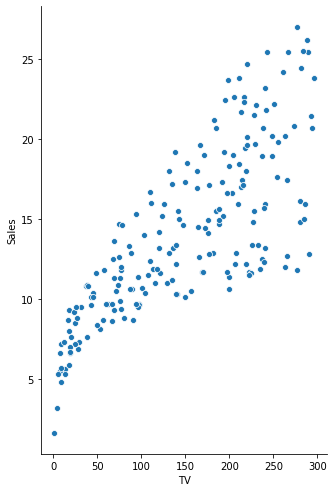

In [61]:
sns.pairplot(advertising, x_vars=['TV'], y_vars='Sales',height=7, aspect=0.7, kind='scatter')

# Perfroming SLR

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

In [58]:
X = advertising['TV']
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [59]:
y = advertising['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

## Splitting Data into Training and Testing Sets


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)

C:\Users\SOUROV SARKAR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2178: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [100]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [101]:
train_test_split   

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [102]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140,)
(140,)
(60,)
(60,)


In [103]:
import numpy as np

X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]

In [104]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


## Performing Linear Regression

In [117]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Coefficients Calculation

In [118]:
print(lr.intercept_)
print(lr.coef_)

6.989665857411679
[0.04649736]


$y = 6.989 + 0.0464 \times TV $<br>



## Predictions

In [119]:
y_pred = lr.predict(X_test)

In [120]:
type(y_pred)

numpy.ndarray

#### Computing RMSE and R^2 Values

Text(0, 0.5, 'Sales')

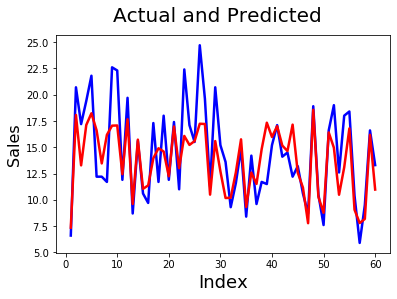

In [121]:
import matplotlib.pyplot as plt
c = [i for i in range(1,61,1)]          
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)               
plt.xlabel('Index', fontsize=18)                               
plt.ylabel('Sales', fontsize=16)                       

Text(0, 0.5, 'ytest-ypred')

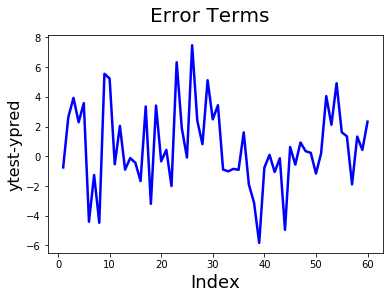

In [122]:
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=16)                # Y-label

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)

In [124]:
r_squared = r2_score(y_test, y_pred)

In [125]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 7.97579853285485
r_square_value : 0.5942987267783302


Text(0, 0.5, 'Predicted Y')

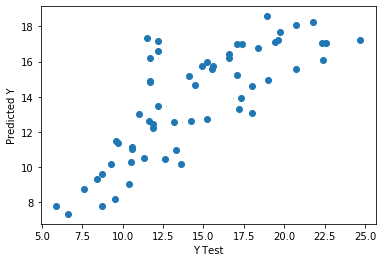

In [126]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')